In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import re
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#Silahkan Tambahkan Package lainnya jika dibutuhkan

In [ ]:
from google.colab import drive

# Replace 'SHARED_FOLDER_LINK' with the actual link of the shared folder
folder_link = 'https://drive.google.com/drive/folders/1Cd1iNDv4gfTUX41myo2m4Fazz_zA9HBG?usp=drive_link'

# Extract the folder ID from the link (you can find it in the URL after 'folders/')
folder_id = folder_link.split('/')[-1]

# Mount the shared folder in Colab
drive.mount('/content/drive', force_remount=True)

# Define the path to the shared folder without including the link
folder_path = '/content/drive/Shared with me/' + folder_id + '/'

Mounted at /content/drive


In [ ]:
github_url = 'https://github.com/BigData-Maestros/Final-Project/blob/8e9096871adfc540aa73b532558bd1f7ebb1c07d/Dataset/Training-Data.csv'

In [ ]:
df = pd.read_csv('Training Data.csv')

## Membaca Dataset Loan Predictor Based On Customer Behavior


In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Descriptive Statistik Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Dari informasi di atas, dapat diketahui bahwa nama kolom dengan tipe datanya sudah sesuai.

In [ ]:
# Mengetahui jumlah kolom dan baris
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan hasil
print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 252000
Jumlah Kolom: 13


Dari informasi di atas, dapat diketahui bahwa pada dataset ini nama kolom beserta tipe datanya sudah sesuai. Dengan jumlah baris sebanyak 252.000 dan jumlah kolom sebanyak 13.

In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Dari informasi di atas, diketahui bahwa tidak ada nilai kosong pada masing-masing kolom.

In [ ]:
df.duplicated().sum()

0

Mengganti Id menjadi index

In [ ]:
df.set_index('Id', inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
# Mengganti nama kolom
df.rename(columns={'Income': 'income', 'Age': 'age', 'Experience': 'experience', 'Married/Single': 'marital_status', 'House_Ownership': 'house_ownership', 'Car_Ownership': 'car_ownership', 'Profession': 'profession', 'CITY': 'city', 'STATE': 'state', 'CURRENT_JOB_YRS': 'current_job_yrs', 'CURRENT_HOUSE_YRS': 'current_house_yrs', 'Risk_Flag': 'risk_flag'}, inplace=True)

# Menampilkan DataFrame setelah perubahan
print("\nDataFrame Setelah Perubahan Nama Kolom:")
df.info()


DataFrame Setelah Perubahan Nama Kolom:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   marital_status     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   profession         252000 non-null  object
 7   city               252000 non-null  object
 8   state              252000 non-null  object
 9   current_job_yrs    252000 non-null  int64 
 10  current_house_yrs  252000 non-null  int64 
 11  risk_flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


Nama kolom sudah seragam.

In [ ]:
df['risk_flag'] = df['risk_flag'].astype(str)

In [ ]:
kontinu = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']
diskrit = ['marital_status', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'risk_flag']

# melihat deskripsi kolom kategorikal & nilai unique
df.select_dtypes(include='object').nunique()

marital_status       2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
risk_flag            2
dtype: int64

In [ ]:
# cek nilai unique di kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

marital_status: ['single' 'married']
house_ownership: ['rented' 'norent_noown' 'owned']
car_ownership: ['no' 'yes']
profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
city: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'


In [ ]:
# Menghilangkan angka dan tanda kurung siku dari data di kolom "city"
df.city = df['city'].str.replace(r'\[\d+\]', '')
df.city = df.city.str.replace('_', ' ')

# Menampilkan DataFrame setelah perubahan
print(df.city)

Id
1                    Rewa
2                Parbhani
3               Alappuzha
4             Bhubaneswar
5         Tiruchirappalli
               ...       
251996            Kolkata
251997               Rewa
251998    Kalyan-Dombivli
251999        Pondicherry
252000              Avadi
Name: city, Length: 252000, dtype: object


In [ ]:
# Menampilkan nilai unik dan frekuensinya pada kolom 'city' yang sudah diurutkan dari frekuensi terkecil
sorted_value_counts_city1 = df.city.value_counts().sort_index()
print("Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'city':")
print(sorted_value_counts_city1)

# Menampilkan jumlah nilai unik
jumlah_nilai_unik_city1 = df.city.nunique()
print("\nJumlah Nilai Unik pada Kolom 'city':", jumlah_nilai_unik_city1)

Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'city':
Adoni             953
Agartala          809
Agra             1012
Ahmedabad         649
Ahmednagar        645
                 ... 
Vijayanagaram    1259
Vijayawada       1172
Visakhapatnam     971
Warangal          459
Yamunanagar       659
Name: city, Length: 316, dtype: int64

Jumlah Nilai Unik pada Kolom 'city': 316


In [ ]:
# Menghilangkan angka dan tanda kurung siku dari data di kolom "state"
df.state = df['state'].str.replace(r'\[\d+\]', '')
df.state = df.state.str.replace('_', ' ')

# Menampilkan DataFrame setelah perubahan
print(df.state)

Id
1         Madhya Pradesh
2            Maharashtra
3                 Kerala
4                 Odisha
5             Tamil Nadu
               ...      
251996       West Bengal
251997    Madhya Pradesh
251998       Maharashtra
251999        Puducherry
252000        Tamil Nadu
Name: state, Length: 252000, dtype: object


In [ ]:
# Menampilkan nilai unik dan frekuensinya pada kolom 'state' yang sudah diurutkan dari frekuensi terkecil
sorted_value_counts_state1 = df.state.value_counts().sort_index()
print("Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'state':")
print(sorted_value_counts_state1)

# Menampilkan jumlah nilai unik
jumlah_nilai_unik_state1 = df.state.nunique()
print("\nJumlah Nilai Unik pada Kolom 'state':", jumlah_nilai_unik_state1)

Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'state':
Andhra Pradesh       25297
Assam                 7062
Bihar                19780
Chandigarh             656
Chhattisgarh          3834
Delhi                 5490
Gujarat              11408
Haryana               7890
Himachal Pradesh       833
Jammu and Kashmir     1780
Jharkhand             8965
Karnataka            11855
Kerala                5805
Madhya Pradesh       14122
Maharashtra          25562
Manipur                849
Mizoram                849
Odisha                4658
Puducherry            1433
Punjab                4720
Rajasthan             9174
Sikkim                 608
Tamil Nadu           16537
Telangana             7524
Tripura                809
Uttar Pradesh        29143
Uttarakhand           1874
West Bengal          23483
Name: state, dtype: int64

Jumlah Nilai Unik pada Kolom 'state': 28


In [ ]:
# melihat data summary
df[kontinu].describe()

,income,age,experience,current_job_yrs,current_house_yrs
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


In [ ]:
# melihat data summary
df[diskrit].describe()

,marital_status,house_ownership,car_ownership,profession,city,state,risk_flag
count,252000,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,316,28,2
top,single,rented,no,Physician,Aurangabad,Uttar Pradesh,0
freq,226272,231898,176000,5957,1543,29143,221004


**Kesimpulan dari Descriptive Statistics**

1. Data terdiri dari 252000 baris dan 13 kolom serta tidak ada nilai null.
2. 5 kolom dengan variabel kontinu : income , age , experience , current_job_yrs , current_house_yrs.
3. 8 kolom dengan variabel diskrit : id , married_single,house_ownership, car_ownership , profession , city , state , risk_flag (target variabel).

## Univariate Analysis

**Distribusi Histogram**

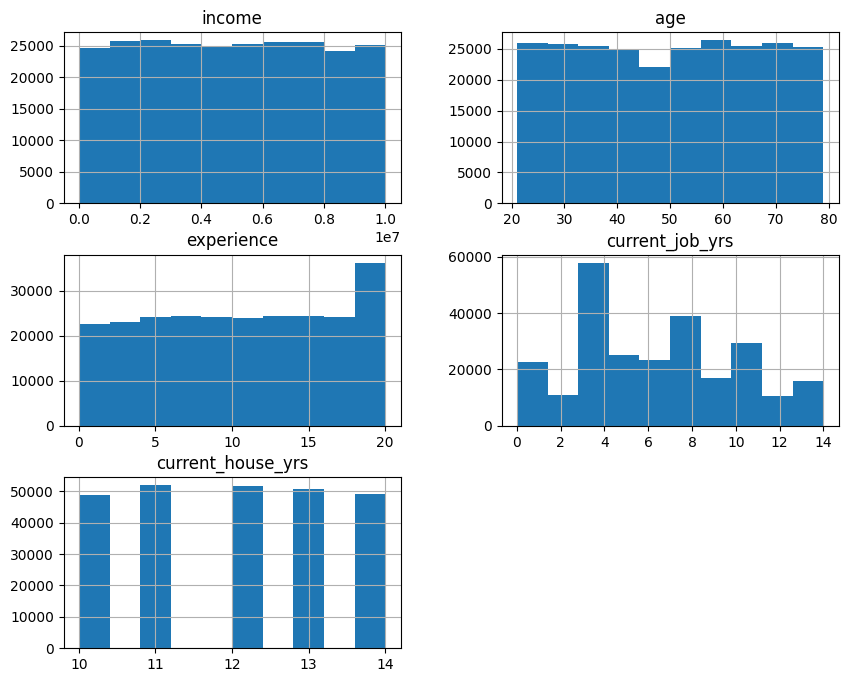

In [ ]:
df.hist( figsize = (10, 8) )
plt.show()

**Skewness**

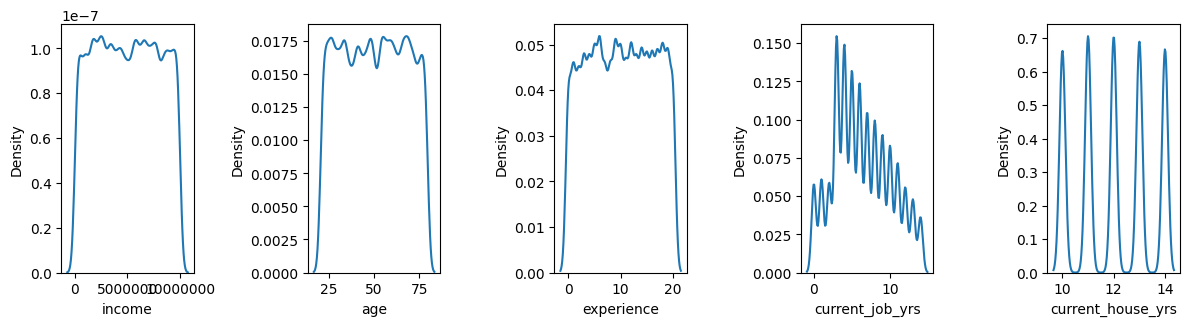

In [ ]:
# Visualize skewness using seaborn
plt.figure(figsize=(12, 6))

for i in range(0, len(kontinu)):
    plt.subplot(2, len(kontinu), i+1)
    sns.kdeplot(df[kontinu[i]])
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
plt.show()


*   Multimodal : income, age, experience, current_house_yrs
*   Skew positif : current_job_yrs




**Outlier**

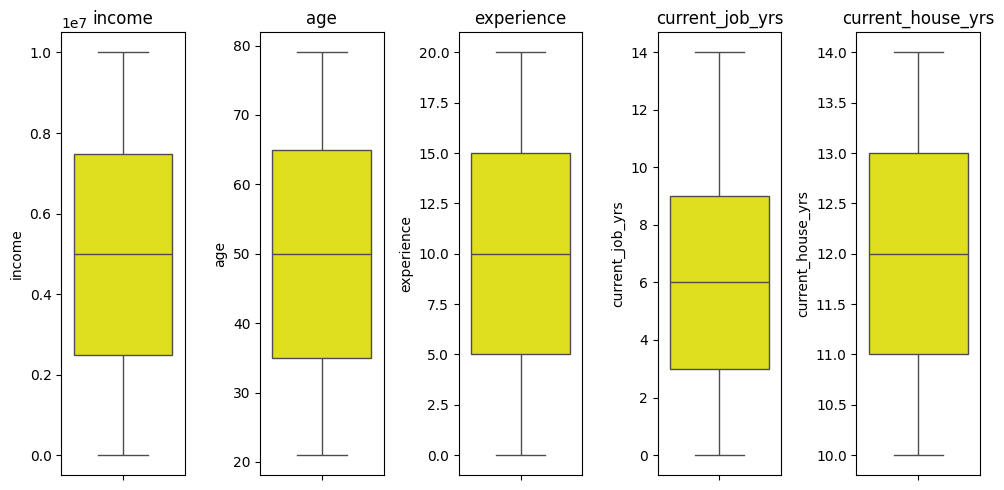

In [ ]:
plt.figure(figsize=(8, 5))
for i, column in enumerate(kontinu, 1):
    plt.subplot(1, len(kontinu), i)
    sns.boxplot(y=df[column], color='yellow', orient='v')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

Dari informasi di atas, dapat diketahui bahwa pada dataset ini tidak ada outlier.

**Distribusi Count per Kolom**

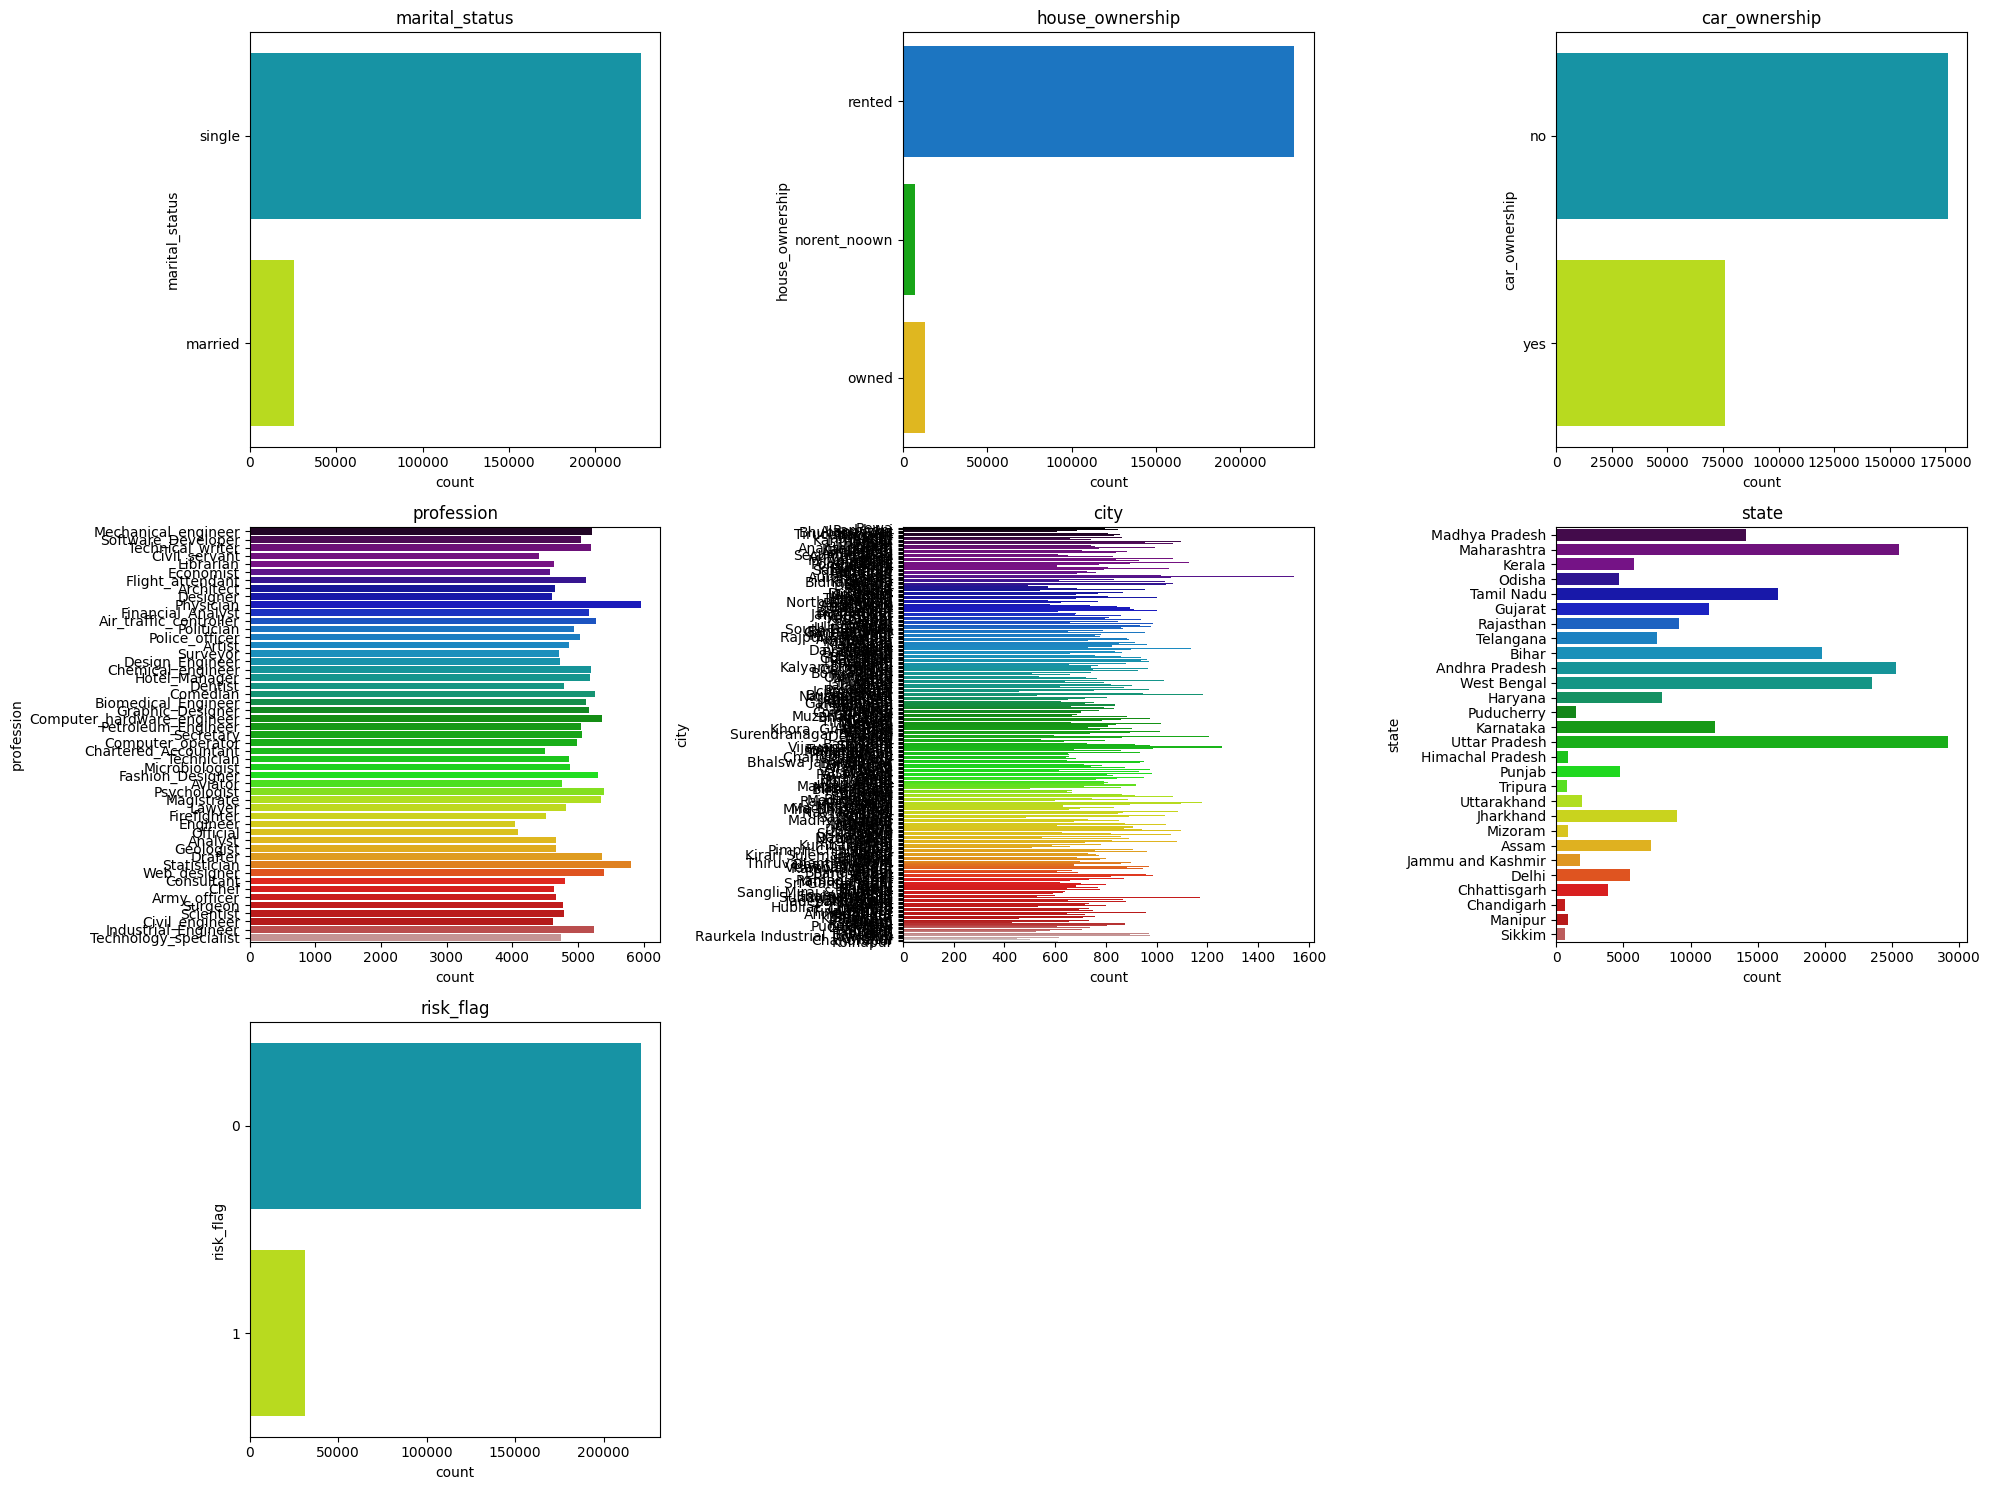

In [ ]:
# Membuat satu subplot untuk setiap count plot
plt.figure(figsize=(20, 15))

for i, column in enumerate(diskrit, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, y=column, palette="nipy_spectral")
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

**Kesimpulan dari Distribusi Data**

1. Kolom-kolom seperti city, state, dan profession memiliki data yang sangat banyak, sehingga diperlukan pengelompokan data untuk menggabungkan kategori serupa menjadi satu kategori baru. Tujuannya adalah untuk menyederhanakan data.
2. Ditemukan ketidakseimbangan dominasi kategori pada kolom marital_status, house_ownership, dan risk_flag yang dapat memengaruhi hasil analisis. Oleh karena itu, perlu dipertimbangkan apakah tindakan seperti oversampling atau undersampling diperlukan untuk menangani ketidakseimbangan tersebut.

**Pengelompokan Kategori Data Numerik Berdasarkan Kuartil**



> Kategori Kolom income



In [ ]:
df_income = pd.DataFrame(df)

# Menghitung kuartil
quartiles = df_income['income'].quantile([0, 0.33, 0.67, 1])

# Membuat fungsi untuk mengkategori income
def categorize_income(income):
    if income <= quartiles[0.33]:
        return 'low'
    elif income <= quartiles[0.67]:
        return 'middle'
    else:
        return 'high'

# Menerapkan fungsi ke kolom baru 'Income_Category'
df_income['income_category'] = df_income['income'].apply(categorize_income)

In [ ]:
# Mengurutkan nilai pada kategori 'low'
low_data_sorted = df_income[df_income['income_category'] == 'low'].sort_values(by='income')

# Menampilkan data yang sudah diurutkan
low_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
129857,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
205454,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
194614,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
86666,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
257,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low


In [ ]:
# Mengurutkan nilai pada kategori 'low'
low_data_sorted = df_income[df_income['income_category'] == 'low'].sort_values(by='income', ascending=False)

# Menampilkan data yang sudah diurutkan
low_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
206944,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low
34069,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low
55707,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,0,low
50282,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low
142098,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low


In [ ]:
# Mengurutkan nilai pada kategori 'middle'
middle_data_sorted = df_income[df_income['income_category'] == 'middle'].sort_values(by='income')

# Menampilkan data yang sudah diurutkan
middle_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
232933,3291476,64,4,single,owned,no,Economist,Pallavaram,Tamil Nadu,3,10,1,middle
245769,3291683,52,19,single,rented,yes,Surveyor,Vadodara,Gujarat,10,14,1,middle
217069,3291892,71,10,single,rented,yes,Air_traffic_controller,Tiruchirappalli,Tamil Nadu,6,13,0,middle
229011,3292164,60,2,single,rented,yes,Army_officer,Amroha,Uttar Pradesh,2,12,0,middle
232219,3292924,68,18,single,rented,yes,Lawyer,Muzaffarnagar,Uttar Pradesh,13,11,0,middle


In [ ]:
# Mengurutkan nilai pada kategori 'middle'
middle_data_sorted = df_income[df_income['income_category'] == 'middle'].sort_values(by='income', ascending=False)

# Menampilkan data yang sudah diurutkan
middle_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
84074,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
35389,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
57032,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
3072,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
159583,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,0,middle


In [ ]:
# Mengurutkan nilai pada kategori 'high'
high_data_sorted = df_income[df_income['income_category'] == 'high'].sort_values(by='income')

# Menampilkan data yang sudah diurutkan
high_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
217479,6671370,60,15,single,rented,no,Scientist,Begusarai,Bihar,6,14,0,high
241147,6671619,22,19,single,rented,no,Chemical_engineer,Dindigul,Tamil Nadu,10,12,0,high
226274,6672068,70,17,single,rented,yes,Firefighter,Jalgaon,Maharashtra,7,13,0,high
248867,6672164,36,17,single,rented,yes,Chartered_Accountant,Kochi,Kerala,14,11,0,high
214834,6672263,75,8,married,rented,yes,Army_officer,Nizamabad,Telangana,8,13,0,high


In [ ]:
# Mengurutkan nilai pada kategori 'high'
high_data_sorted = df_income[df_income['income_category'] == 'high'].sort_values(by='income', ascending=False)

# Menampilkan data yang sudah diurutkan
high_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
229020,9999938,34,19,single,rented,yes,Police_officer,Panchkula,Haryana,6,13,0,high
225536,9999400,41,11,single,rented,no,Librarian,Jaipur,Rajasthan,10,14,0,high
162107,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0,high
59575,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0,high
64996,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0,high




> Kategori Kolom age



In [ ]:
df_age = pd.DataFrame(df)

def classify_age(age):
    if age < 30:
        return 'young'
    elif age < 60:
        return 'adult'
    else:
        return 'elder'


# Menerapkan fungsi ke kolom baru 'Age_Category'
df_age['age_category'] = df_age['age'].apply(classify_age)

[referensi](https://www.neliti.com/id/publications/249455/klasifikasi-kelompok-umur-manusia-berdasarkan-analisis-dimensifraktal-box-counti)

In [ ]:
# Mengurutkan nilai pada kategori 'young'
young_data_sorted = df_age[df_age['age_category'] == 'young'].sort_values(by='age')

# Menampilkan data yang sudah diurutkan
young_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
111589,3873393,21,7,single,rented,yes,Drafter,Lucknow,Uttar Pradesh,7,14,1,middle,young
129290,6062192,21,9,married,rented,no,Technology_specialist,Rajkot,Gujarat,7,13,0,middle,young
129279,8514369,21,5,single,rented,yes,Scientist,Udaipur,Rajasthan,4,13,0,high,young
19555,8075181,21,12,single,rented,no,Chartered_Accountant,Ongole,Andhra Pradesh,7,14,1,high,young
238373,4342961,21,3,single,rented,no,Engineer,Kishanganj,Bihar,3,12,0,middle,young


In [ ]:
# Mengurutkan nilai pada kategori 'young'
remaja_data_sorted = df_age[df_age['age_category'] == 'young'].sort_values(by='age', ascending=False)
# Menampilkan data yang sudah diurutkan
remaja_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
126537,3671761,29,18,single,rented,yes,Scientist,Dehradun,Uttarakhand,3,14,0,middle,young
153465,3671761,29,18,single,rented,yes,Scientist,Dehradun,Uttarakhand,3,14,0,middle,young
153607,4432896,29,14,single,rented,no,Civil_engineer,Kavali,Andhra Pradesh,13,14,0,middle,young
216033,6298584,29,13,single,rented,no,Air_traffic_controller,Noida,Uttar Pradesh,10,10,0,middle,young
153559,9082904,29,13,single,rented,no,Artist,Mango,Jharkhand,11,12,0,high,young


Rentang kategori 'young' yaitu berusia 21-29.

In [ ]:
# Mengurutkan nilai pada kategori 'adult'
adult_data_sorted = df_age[df_age['age_category'] == 'adult'].sort_values(by='age')

# Menampilkan data yang sudah diurutkan
adult_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
153383,5796023,30,3,single,rented,no,Dentist,Buxar,Bihar,3,11,1,middle,adult
208441,9173092,30,19,single,rented,no,Psychologist,Chapra,Bihar,9,11,1,high,adult
72372,3696953,30,17,single,rented,no,Web_designer,Allahabad,Uttar Pradesh,4,11,0,middle,adult
45910,4244135,30,9,single,rented,no,Librarian,Thanjavur,Tamil Nadu,9,10,0,middle,adult
164139,5796023,30,3,single,rented,no,Dentist,Buxar,Bihar,3,11,1,middle,adult


In [ ]:
# Mengurutkan nilai pada kategori 'adult'
adult_data_sorted = df_age[df_age['age_category'] == 'adult'].sort_values(by='age', ascending=False)

# Menampilkan data yang sudah diurutkan
adult_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
240294,5678134,59,1,single,rented,no,Chef,Cuttack,Odisha,1,11,0,middle,adult
161396,3369187,59,3,single,rented,yes,Surgeon,Tirunelveli,Tamil Nadu,3,14,1,middle,adult
46117,5465069,59,15,single,rented,yes,Aviator,Proddatur,Andhra Pradesh,3,11,0,middle,adult
32369,9861298,59,16,single,rented,no,Technical_writer,North Dumdum,West Bengal,9,11,1,high,adult
218030,337721,59,7,single,rented,no,Police_officer,Jalna,Maharashtra,7,10,0,low,adult


Rentang kategori 'adult' yaitu berusia 30-59.

In [ ]:
# Mengurutkan nilai pada kategori 'elder'
elder_data_sorted = df_age[df_age['age_category'] == 'elder'].sort_values(by='age')

# Menampilkan data yang sudah diurutkan
elder_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
206591,424512,60,16,single,rented,no,Designer,Bhopal,Madhya Pradesh,5,11,1,low,elder
56099,9842635,60,7,married,owned,yes,Politician,Malda,West Bengal,7,11,0,high,elder
214543,9035347,60,3,single,rented,yes,Computer_operator,Bahraich,Uttar Pradesh,3,13,0,high,elder
183889,7867670,60,19,single,rented,no,Biomedical_Engineer,Bhavnagar,Gujarat,12,13,0,high,elder
10050,6669896,60,15,single,rented,yes,Computer_hardware_engineer,Rampur,Uttar Pradesh,14,12,0,middle,elder


In [ ]:
# Mengurutkan nilai pada kategori 'elder'
elder_data_sorted = df_age[df_age['age_category'] == 'elder'].sort_values(by='age', ascending=False)

# Menampilkan data yang sudah diurutkan
elder_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
204746,5203994,79,3,single,rented,yes,Air_traffic_controller,Sasaram,Bihar,3,14,0,middle,elder
28705,9910826,79,8,single,rented,no,Architect,Kurnool,Andhra Pradesh,8,10,0,high,elder
68165,8724013,79,19,single,rented,no,Economist,Morena,Madhya Pradesh,13,12,0,high,elder
104676,9962662,79,19,single,rented,no,Microbiologist,Amritsar,Punjab,7,11,0,high,elder
11964,9187149,79,1,single,rented,yes,Chartered_Accountant,Nagaon,Assam,1,13,0,high,elder


Rentang kategori 'elder' yaitu berusia 60-79.



> Kategori Kolom experience



In [ ]:
df_experience = pd.DataFrame(df)

# Membuat fungsi untuk mengkategori experience
def categorize_experience(experience):
    if experience <= 2:
        return 'entry level'
    elif experience <= 5:
        return 'mid level'
    else:
        return 'senior level'

# Menerapkan fungsi ke kolom baru 'Experience_Category'
df_experience['experience_category'] = df_experience['experience'].apply(categorize_experience)

[referensi](https://revou.co/panduan-karir/jenjang-karir-data-analyst)

In [ ]:
# Mengurutkan nilai pada kategori 'entry level'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'entry level'].sort_values(by='experience')

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,,
251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,middle,adult,entry level,< 5 tahun,design art,Rural,south_zone
146687,3361391,48,0,single,rented,no,Politician,Nandyal,Andhra Pradesh,0,14,0,middle,adult,entry level,< 5 tahun,gov,Suburban,south_zone
71816,8508480,46,0,single,rented,no,Biomedical_Engineer,Kulti,West Bengal,0,10,0,high,adult,entry level,< 5 tahun,engineer tech,Rural,east_zone
229961,3936016,38,0,single,rented,yes,Aviator,Bilaspur,Chhattisgarh,0,13,0,middle,adult,entry level,< 5 tahun,aviation,Rural,west_zone
71825,9744011,44,0,single,rented,yes,Web_designer,Dhule,Maharashtra,0,10,0,high,adult,entry level,< 5 tahun,design art,Rural,west_zone


In [ ]:
# Mengurutkan nilai pada kategori 'entry level'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'entry level'].sort_values(by='experience', ascending=False)

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,,
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,middle,adult,entry level,< 5 tahun,engineer tech,Rural,east_zone
126336,3453372,47,2,single,rented,no,Financial_Analyst,Saharanpur,Uttar Pradesh,2,10,1,middle,adult,entry level,< 5 tahun,consultant,Suburban,north_zone
126362,9644741,45,2,single,rented,no,Firefighter,Anand,Gujarat,2,10,0,high,adult,entry level,< 5 tahun,gov,Rural,west_zone
126373,3478269,28,2,single,rented,no,Software_Developer,Gopalpur,West Bengal,2,13,0,middle,young,entry level,< 5 tahun,engineer tech,Rural,east_zone
126385,4742685,38,2,single,rented,yes,Petroleum_Engineer,Guntakal,Andhra Pradesh,2,12,1,middle,adult,entry level,< 5 tahun,engineer tech,Rural,south_zone


0-1 tahun pengalaman termasuk dalam entry level.

In [ ]:
# Mengurutkan nilai pada kategori 'mid level'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'mid level'].sort_values(by='experience')

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0,low,young,mid level,< 5 tahun,engineer tech,Rural,west_zone
74884,637100,58,3,single,rented,yes,Geologist,Kottayam,Kerala,3,11,0,low,adult,mid level,< 5 tahun,consultant,Rural,south_zone
175708,7064604,74,3,single,rented,no,Petroleum_Engineer,Thrissur,Kerala,3,12,0,high,elder,mid level,< 5 tahun,engineer tech,Rural,south_zone
74888,579572,70,3,married,rented,yes,Statistician,Parbhani,Maharashtra,3,10,0,low,elder,mid level,< 5 tahun,consultant,Rural,west_zone
175699,4094948,49,3,single,rented,yes,Flight_attendant,Vadodara,Gujarat,3,12,1,middle,adult,mid level,< 5 tahun,aviation,Urban,west_zone


In [ ]:
# Mengurutkan nilai pada kategori 'mid level'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'mid level'].sort_values(by='experience', ascending=False)

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,,
127015,2740967,63,5,single,rented,no,Civil_servant,Nagaon,Assam,5,13,0,low,elder,mid level,<= 10 tahun,gov,Rural,east_zone
107293,1451174,69,5,married,rented,no,Financial_Analyst,Patna,Bihar,5,12,0,low,elder,mid level,<= 10 tahun,consultant,Urban,east_zone
107299,2267970,64,5,single,rented,no,Civil_engineer,Hindupur,Andhra Pradesh,5,10,0,low,elder,mid level,<= 10 tahun,engineer tech,Rural,south_zone
190129,6357644,37,5,single,rented,no,Surgeon,Raebareli,Uttar Pradesh,5,12,0,middle,adult,mid level,<= 10 tahun,health,Rural,north_zone
107297,8888670,23,5,single,rented,no,Physician,Jamnagar,Gujarat,5,12,0,high,young,mid level,<= 10 tahun,health,Rural,west_zone


2-5 tahun pengalaman termasuk dalam mid level.

In [ ]:
# Mengurutkan nilai pada kategori 'senior level'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'senior level'].sort_values(by='experience')

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
125702,3220675,42,6,single,rented,yes,Psychologist,Hubliâ€“Dharwad,Karnataka,4,12,0,low,adult,senior level
36382,5757407,68,6,single,rented,no,Flight_attendant,Rewa,Madhya Pradesh,6,14,0,middle,elder,senior level
172485,5254986,48,6,single,rented,no,Financial_Analyst,Aurangabad,Maharashtra,6,14,0,middle,adult,senior level
172494,9594719,59,6,single,rented,no,Physician,Surat,Gujarat,6,12,0,high,adult,senior level
172527,2386843,45,6,single,rented,no,Artist,Kirari Suleman Nagar,Delhi,6,10,0,low,adult,senior level


In [ ]:
# Mengurutkan nilai pada kategori 'senior level'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'senior level'].sort_values(by='experience', ascending=False)

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
156805,2183371,23,20,single,owned,no,Police_officer,Jhansi,Uttar Pradesh,3,13,0,low,young,senior level
154000,16896,56,20,married,rented,no,Army_officer,Aligarh,Uttar Pradesh,7,12,0,low,adult,senior level
113717,1108464,57,20,single,rented,no,Engineer,Morena,Madhya Pradesh,7,14,0,low,adult,senior level
11842,5354814,29,20,single,owned,yes,Industrial_Engineer,Thiruvananthapuram,Kerala,14,14,0,middle,young,senior level
45752,8813566,38,20,married,rented,no,Geologist,Raurkela Industrial Township,Odisha,6,12,0,high,adult,senior level


6-20 tahun pengalaman termasuk dalam senior level.



> Kategori Kolom current_job_yrs



In [ ]:
df_job = pd.DataFrame(df)

def categorize_job(job):
    if job < 5:
        return '< 5 tahun'
    elif 5 <= job <= 10:
        return '<= 10 tahun'
    else:
        return '> 10 tahun'

# Menerapkan fungsi ke kolom baru 'job_category'
df['job_category'] = df['current_job_yrs'].apply(categorize_job)



> Merged Dataframe



In [ ]:
# Menggabungkan df_income dan df_job berdasarkan indeks
merged_df = df_income[['income_category']].join(df_age[['age_category']])

# Menggabungkan dengan df_age berdasarkan indeks
merged_df = merged_df.join(df_experience[['experience_category']])

# Menggabungkan dengan df_experience berdasarkan indeks
merged_df = merged_df.join(df_job[['job_category']])


# Menampilkan hasil
merged_df

,income_category,age_category,experience_category,job_category
Id,,,,
1,low,young,mid level,< 5 tahun
2,high,adult,senior level,<= 10 tahun
3,middle,elder,mid level,< 5 tahun
4,middle,adult,entry level,< 5 tahun
5,middle,adult,senior level,< 5 tahun
...,...,...,...,...
251996,high,adult,senior level,<= 10 tahun
251997,low,young,senior level,<= 10 tahun
251998,middle,adult,senior level,<= 10 tahun


In [ ]:
kontinu_group = ['income_category', 'age_category', 'experience_category', 'job_category']

Melihat distribusi pada fitur kontinue group

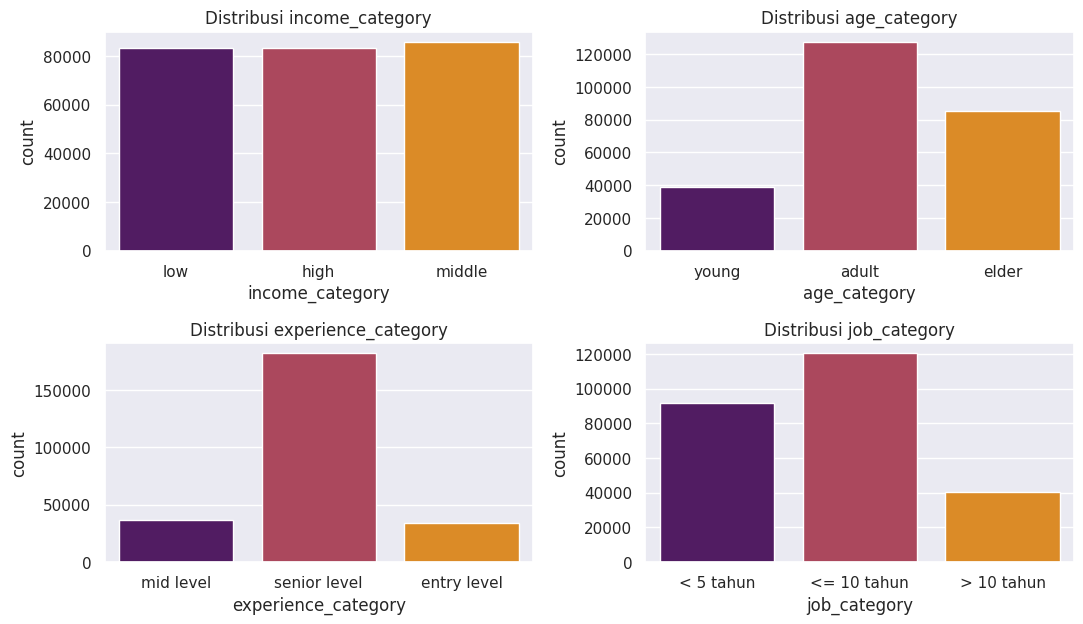

In [ ]:
# Mengatur warna dan ukuran
sns.set(style="darkgrid")
plt.figure(figsize=(11, 9))

# Loop untuk membuat subplot
for i in range(0, len(kontinu_group)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=merged_df[kontinu_group[i]], palette='inferno')
    plt.title(f'Distribusi {kontinu_group[i]}')
    plt.tight_layout()

# Menampilkan hasil
plt.show()

1. Dari hasil distribusi di atas, dapat diketahui bahwa pada kolom income_category nilai yang mendominasi adalah middle.
2. Pada kolom age_category nilai yang mendominasi adalah adult.
3. Pada kolom experience_category nilai yang mendominasi adalah senior level.
4. Pada kolom job_category nilai yang mendominasi adalah <= 10 tahun.

**Pengelompokkan Data Categorical**

In [ ]:
#Data professions
profession_group = {
    'engineer tech': ['Computer_hardware_engineer', 'Industrial_Engineer', 'Mechanical_engineer', 'Chemical_engineer',
                        'Biomedical_Engineer', 'Software_Developer', 'Petroleum_Engineer', 'Civil_engineer',
                        'Design_Engineer', 'Engineer','Technician', 'Technology_specialist', 'Computer_operator','Technical_writer'],
    'design art': ['Web_designer', 'Fashion_Designer', 'Graphic_Designer', 'Artist', 'Designer','Comedian','Chef'],
    'health': ['Dentist', 'Surgeon', 'Microbiologist', 'Nurse','Psychologist','Physician'],
    'consultant': ['Financial_Analyst', 'Consultant', 'Chartered_Accountant','Lawyer', 'Economist','Surveyor', 'Analyst',
                    'Architect','Statistician', 'Scientist', 'Geologist'],
    'office management': ['Magistrate', 'Secretary', 'Official', 'Hotel_Manager','Drafter','Librarian'],
    'aviation': ['Flight_attendant', 'Aviator','Air_traffic_controller'],
    'gov': ['Police_officer','Politician','Army_officer', 'Firefighter', 'Civil_servant']
}

In [ ]:
df['profession_group'] = df['profession'].apply(lambda x: next((key for key, value in profession_group.items() if x in value), 'other'))

In [ ]:
def city_group(city):
    if city in ['Delhi city', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore']:
        return 'Metro'
    elif city in ['Ahmedabad', 'Hyderabad', 'Pune', 'Surat', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Visakhapatnam', 'Indore', 'Thane',
                  'Bhopal', 'Pimpri-Chinchwad', 'Patna', 'Vadodara', 'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik', 'Faridabad', 'Meerut', 'Rajkot',
                  'Varanasi', 'Srinagar', 'Amritsar', 'Allahabad', 'Jabalpur', 'Gwalior', 'Vijayawada', 'Jodhpur', 'Raipur', 'Kota', 'Guwahati', 'Chandigarh city']:
        return 'Urban'
    elif city in ['Navi Mumbai', 'Kalyan-Dombivli', 'Vasai-Virar', 'Mira-Bhayandar', 'Thiruvananthapuram', 'Bhiwandi', 'Noida', 'Bhopal', 'Howrah',
                  'Saharanpur', 'Berhampur', 'Suryapet', 'Muzaffarpur', 'Nadiad', 'Siliguri', 'Bhavnagar', 'Kurnool', 'Tenali', 'Satna', 'Nandyal',
                  'Etawah', 'Morena', 'Ballia', 'Machilipatnam', 'Mau', 'Machilipatnam', 'Bhagalpur', 'Siwan', 'Meerut', 'Dibrugarh', 'Gaya', 'Darbhanga',
                  'Hajipur', 'Mirzapur', 'Akola', 'Satna', 'Motihari', 'Jalna', 'Ramgarh', 'Ozhukarai', 'Saharsa', 'Munger', 'Farrukhabad', 'Nangloi Jat',
                  'Thoothukudi', 'Nagercoil', 'Rourkela', 'Jhansi', 'Sultan Pur Majra']:
        return 'Suburban'
    else:
        return 'Rural'

In [ ]:
df['city_group'] = df['city'].apply(city_group)

In [ ]:
state_group = {
    'north_zone': ['Uttar Pradesh', 'Haryana', 'Jammu and Kashmir', 'Punjab', 'Uttarakhand', 'Chandigarh', 'Delhi', 'Himachal Pradesh'],
    'east_zone': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Assam', 'Sikkim', 'Tripura', 'Mizoram', 'Manipur'],
    'south_zone': ['Andhra Pradesh', 'Tamil Nadu', 'Karnataka', 'Telangana', 'Kerala', 'Puducherry'],
    'west_zone': ['Maharashtra', 'Gujarat', 'Rajasthan', 'Chhattisgarh', 'Madhya Pradesh'],
}

In [ ]:
df['state_group'] = df['state'].apply(lambda x: next((key for key, value in state_group.items() if x in value), 'Other'))

In [ ]:
df

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0,low,young,mid level,< 5 tahun,engineer tech,Rural,west_zone
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high,adult,senior level,<= 10 tahun,engineer tech,Rural,west_zone
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,middle,elder,mid level,< 5 tahun,engineer tech,Rural,south_zone
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,middle,adult,mid level,< 5 tahun,engineer tech,Rural,east_zone
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil Nadu,3,14,1,middle,adult,senior level,< 5 tahun,gov,Rural,south_zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West Bengal,6,11,0,high,adult,senior level,<= 10 tahun,health,Metro,east_zone
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya Pradesh,6,11,0,low,young,senior level,<= 10 tahun,gov,Rural,west_zone
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,middle,adult,senior level,<= 10 tahun,engineer tech,Suburban,west_zone


In [ ]:
diskrit_group = ['profession_group', 'city_group', 'state_group']

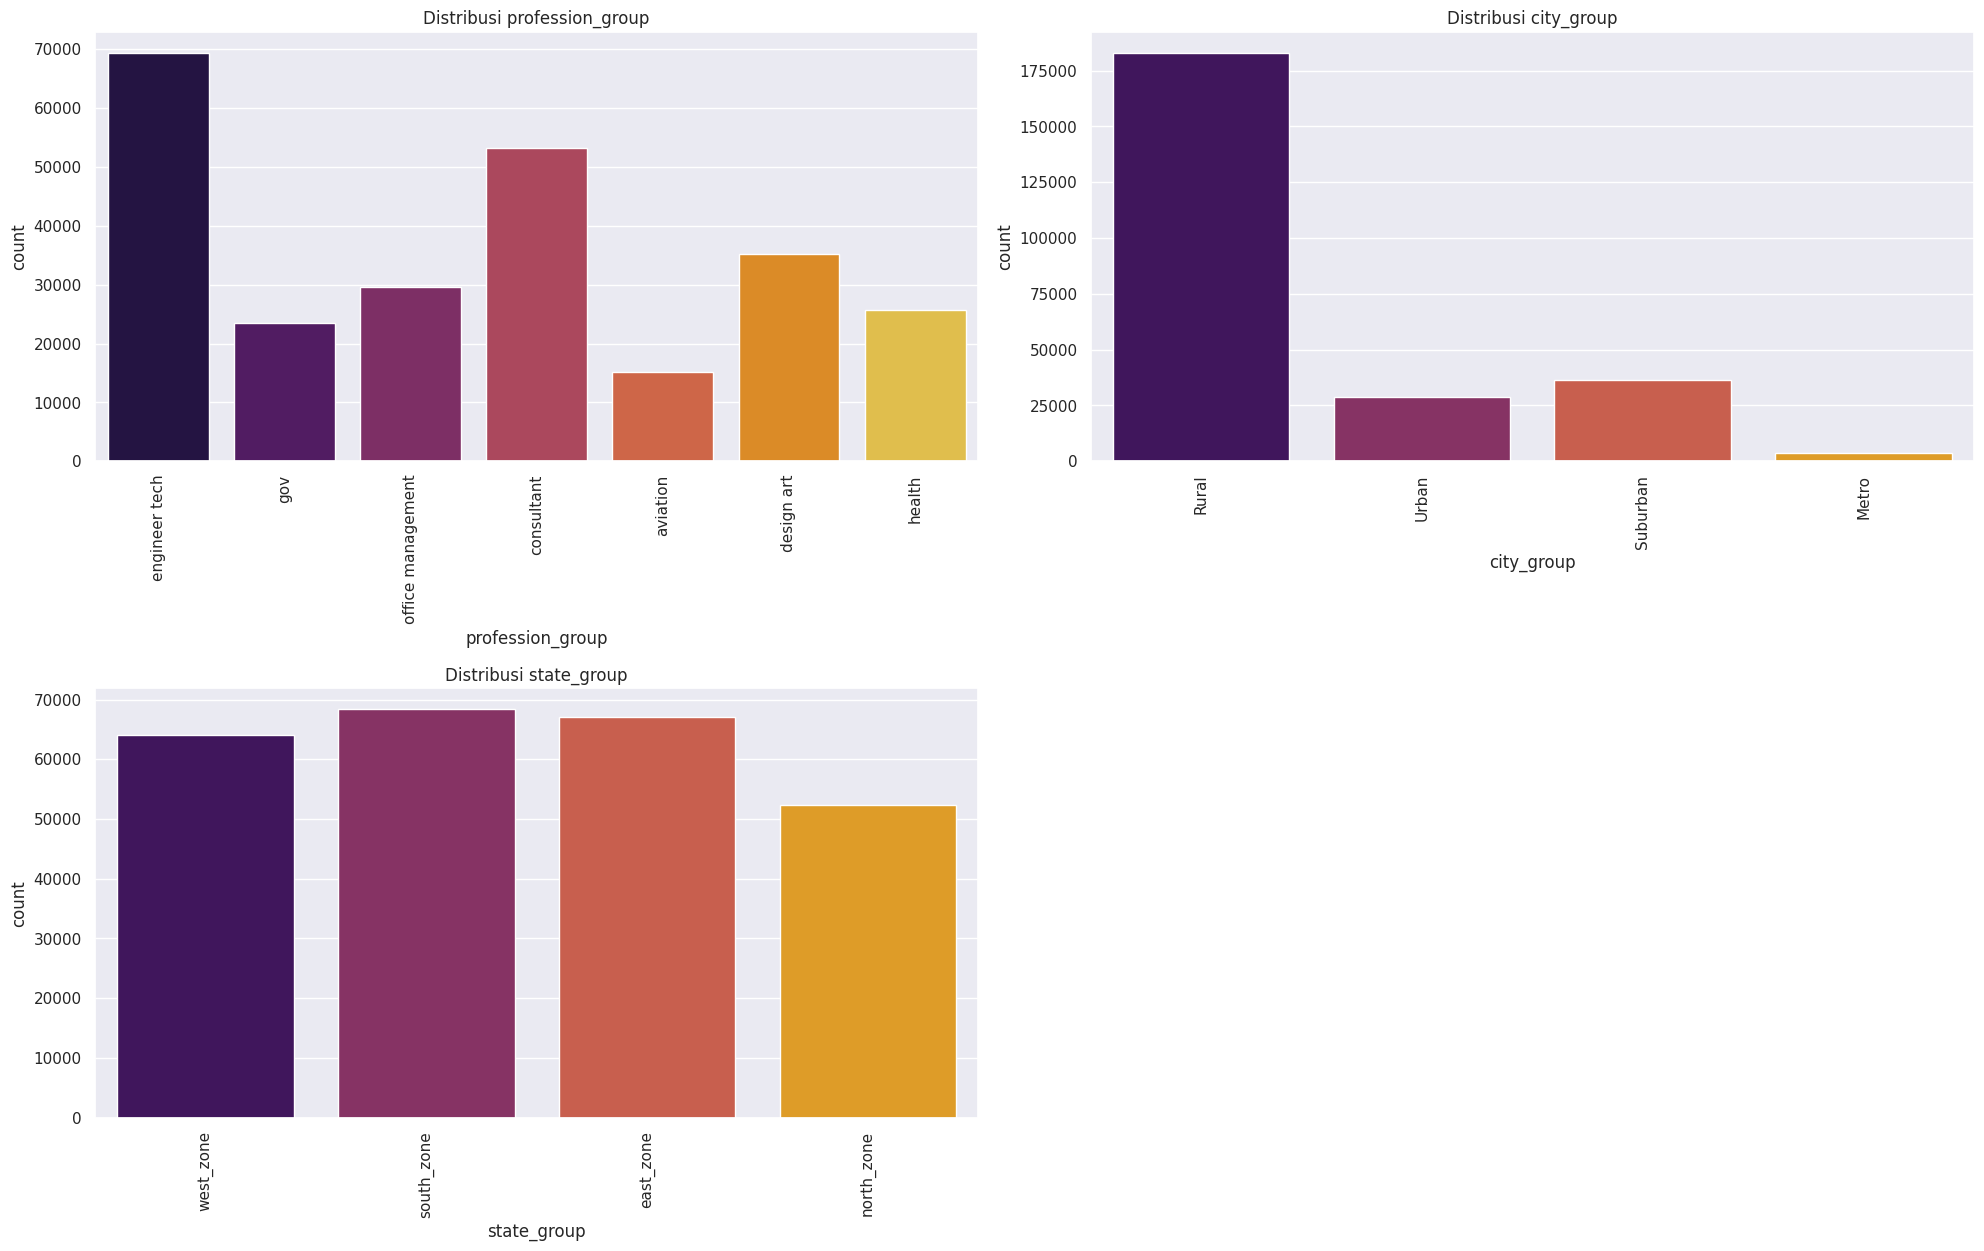

In [ ]:
# Mengatur warna dan ukuran
sns.set(style="darkgrid")
plt.figure(figsize=(20, 18))

# Loop untuk membuat subplot
for i in range(0, len(diskrit_group)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[diskrit_group[i]], palette='inferno')
    plt.xticks(rotation=90)
    plt.title(f'Distribusi {diskrit_group[i]}')
    plt.tight_layout()

# Menampilkan hasil
plt.show()

1. Pada kolom profession_group nilai yang mendominasi adalah engineer tech.
2. Pada kolom city_group nilai yang mendominasi adalah Rural.
3. Pada kolom state_group nilai yang mendominasi adalah south_zone.


Setelah dilakukan grouping pada kolom-kolom yang memiliki kategori yang luas, countplot lebih mudah dibaca dan selanjutnya akan diproses lebih lanjut pada Multivariate Analysis.

## Multivariate Analysis

In [ ]:
df['risk_flag'] = df['risk_flag'].astype(int)

### Mencari Korelasi antar Fitur Numerical

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

fig = go.Figure()
fig.add_trace(go.Heatmap(z = corr, x = corr.columns.tolist(),y = corr.columns.tolist(),colorscale = 'RdBu',xgap = 1,ygap = 1,hoverinfo = "none"))
fig.add_trace(go.Heatmap(
    z=corr,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    text=corr.round(2),  # Menambahkan nilai korelasi sebagai teks (dapat disesuaikan)
    colorscale='RdBu',
    xgap=1,
    ygap=1,
    hoverinfo="text"  # Menampilkan nilai korelasi sebagai hover info
))
 #Menambahkan anotasi pada setiap kotak
for i, row in enumerate(corr.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            text=str(round(value, 2)),
            x=corr.columns[j],
            y=corr.columns[i],
            xref='x1',
            yref='y1',
            showarrow=False,
            font=dict(color='yellow' if abs(value) > 0.5 else 'white')  # Menentukan warna teks berdasarkan nilai korelasi
        )
fig.update_layout(
    {
        "title": {"text": "<b>Correlation in numerical features</b>","x": 0.5,"y": 0.9,"font": {"size": 15}
        },
        "xaxis": {"title": "Columns","tickfont": {"size": 8}
        },
        "yaxis": {"title": "Columns","tickfont": {"size": 8}
        },

        "template":'plotly_white',
        "yaxis_autorange" : "reversed"
    }
)
fig.show()

Terlihat dari korelasi heatmap diatas terlihat bahwa current_job_years dan experience mempunyai korelasi yang besar untuk itu kita akan memilih salah satu saja sebagai fitur dari target agar tidak terjadi Multikolinearitas.

### Distribusi data numerical terhadap risk flag

In [ ]:
df[kontinu].head()

,income,age,experience,current_job_yrs,current_house_yrs
Id,,,,,
1,1303834,23,3,3,13
2,7574516,40,10,9,13
3,3991815,66,4,4,10
4,6256451,41,2,2,12
5,5768871,47,11,3,14


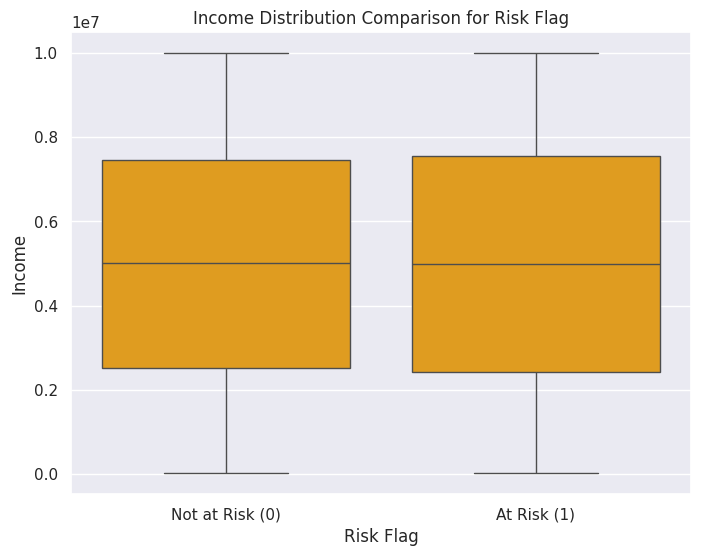

In [ ]:
# Melihat distribusi data income berdasarkan risk flag

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='income', color='orange')

plt.title('Income Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Income')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

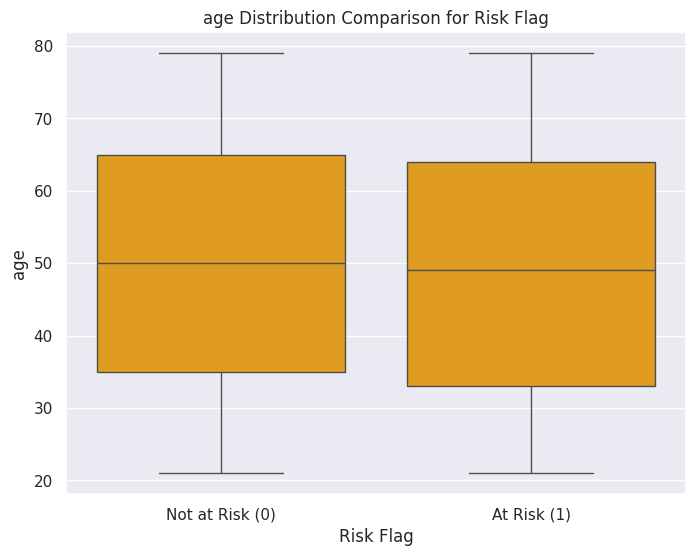

In [ ]:
# Melihat distribusi data age berdasarkan risk flag

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='age', color='orange')

plt.title('age Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('age')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

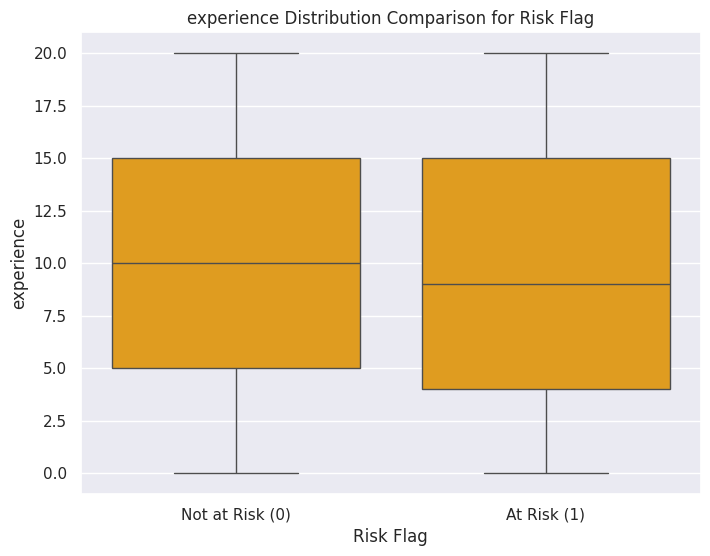

In [ ]:
# Melihat distribusi data experience berdasarkan risk flag

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='experience', color='orange')

plt.title('experience Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('experience')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

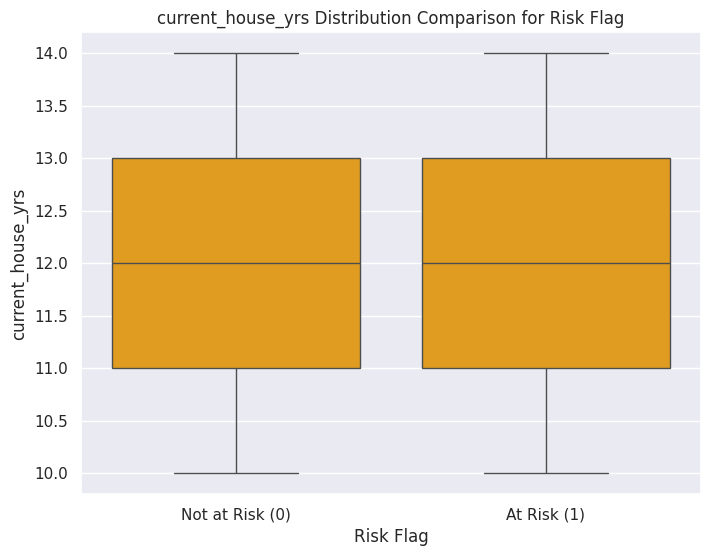

In [ ]:

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='current_house_yrs', color='orange')

plt.title('current_house_yrs Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('current_house_yrs')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

In [ ]:
cats = ['marital_status', 'house_ownership',
       'car_ownership','income_category','age_category',
       'experience_category', 'job_category', 'profession_group', 'city_group',
       'state_group', 'risk_flag']
df_categorikal = df[cats]
df_categorikal.head()

,marital_status,house_ownership,car_ownership,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group,risk_flag
Id,,,,,,,,,,,
1,single,rented,no,low,young,mid level,< 5 tahun,engineer tech,Rural,west_zone,0
2,single,rented,no,high,adult,senior level,<= 10 tahun,engineer tech,Rural,west_zone,0
3,married,rented,no,middle,elder,mid level,< 5 tahun,engineer tech,Rural,south_zone,0
4,single,rented,yes,middle,adult,entry level,< 5 tahun,engineer tech,Rural,east_zone,1
5,single,rented,no,middle,adult,senior level,< 5 tahun,gov,Rural,south_zone,1


### Mencari Korelasi antar fitur kategorikal

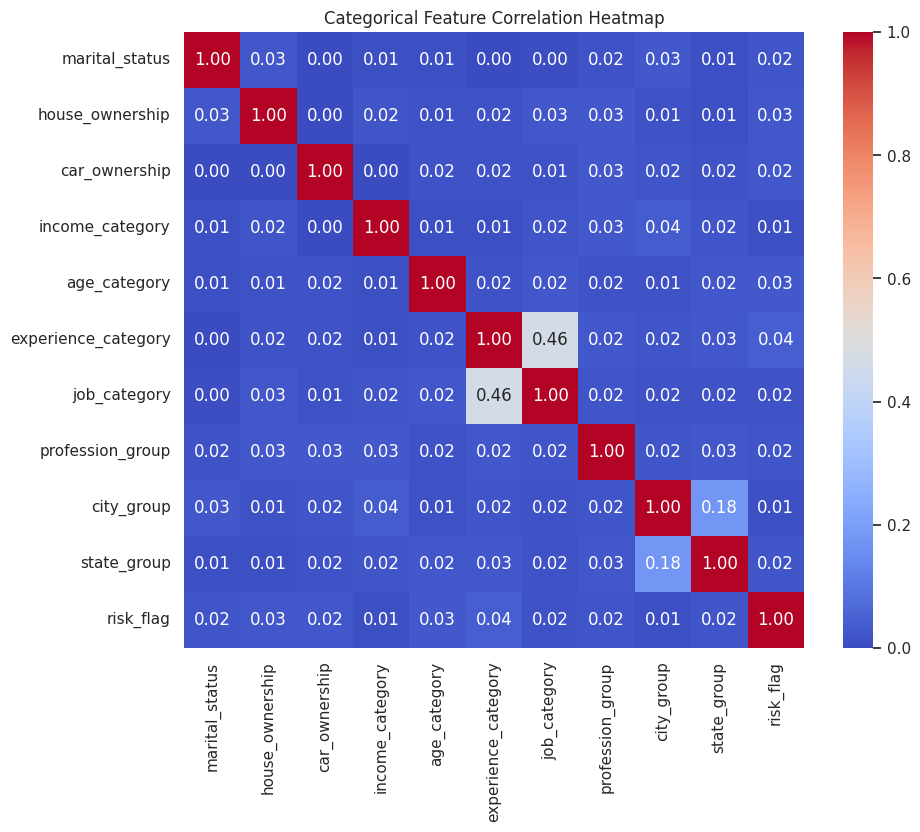

In [ ]:
# Label encoding untuk mengubah kategori menjadi numerik
le = LabelEncoder()
df_encoded = df_categorikal.apply(le.fit_transform)

# Fungsi untuk menghitung korelasi Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Hitung korelasi antar fitur kategorikal
corr_matrix = pd.DataFrame(index=cats, columns=cats)

for i in range(len(cats)):
    for j in range(i, len(cats)):
        corr = cramers_v(df_encoded[cats[i]], df_encoded[cats[j]])
        corr_matrix.at[cats[i], cats[j]] = corr
        corr_matrix.at[cats[j], cats[i]] = corr

# Konversi nilai matriks korelasi ke tipe data float
corr_matrix = corr_matrix.astype(float)
# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Feature Correlation Heatmap')
plt.show()


Terlihat dari heatmap diatas tidak ada data yang mempunyai korelasi yang signifikan. Hal tersebut mengindikasikan bahwa fitur-fitur tersebut bersifat independen satu sama lain  


### Melihat persentase perbandinganrisk flag dalam setiap kategori

In [ ]:
df[cats].head()

,marital_status,house_ownership,car_ownership,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group,risk_flag
Id,,,,,,,,,,,
1,single,rented,no,low,young,mid level,< 5 tahun,engineer tech,Rural,west_zone,0
2,single,rented,no,high,adult,senior level,<= 10 tahun,engineer tech,Rural,west_zone,0
3,married,rented,no,middle,elder,mid level,< 5 tahun,engineer tech,Rural,south_zone,0
4,single,rented,yes,middle,adult,entry level,< 5 tahun,engineer tech,Rural,east_zone,1
5,single,rented,no,middle,adult,senior level,< 5 tahun,gov,Rural,south_zone,1


In [ ]:
cats = ['marital_status', 'house_ownership', 'car_ownership', 'income_category',
        'age_category', 'experience_category', 'job_category', 'profession_group',
        'city_group', 'state_group']

for cat in cats:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase risk flag 1 dalam setiap kategori
    cats_group = df[df['risk_flag'] == 1].groupby(cat)['risk_flag'].count() / df.groupby(cat)['risk_flag'].count() * 100
cats_group

state_group
east_zone     13.154795
north_zone    11.466804
south_zone    11.608304
west_zone     12.825273
Name: risk_flag, dtype: float64

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

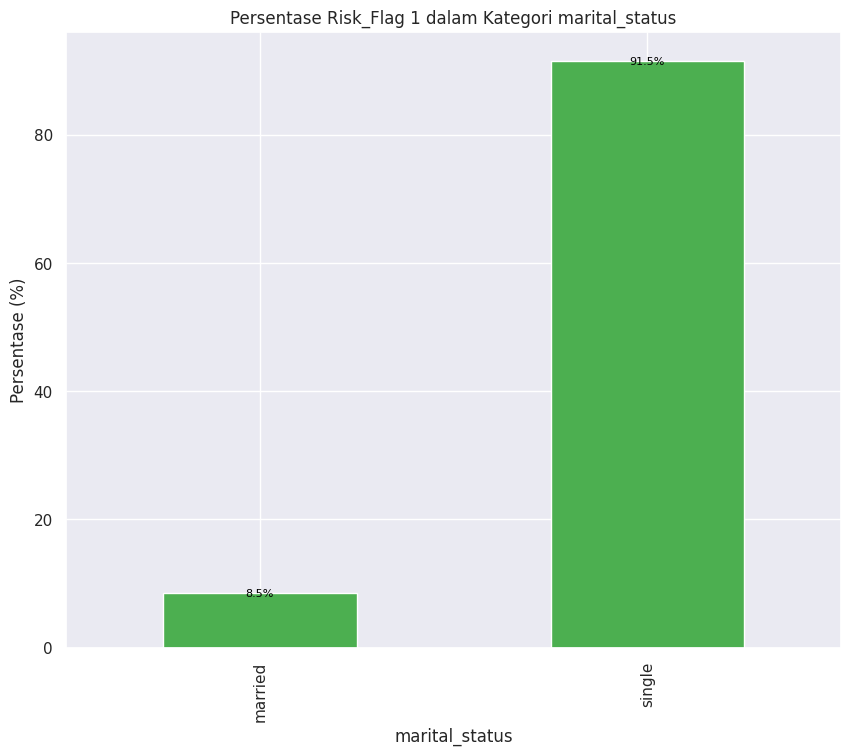

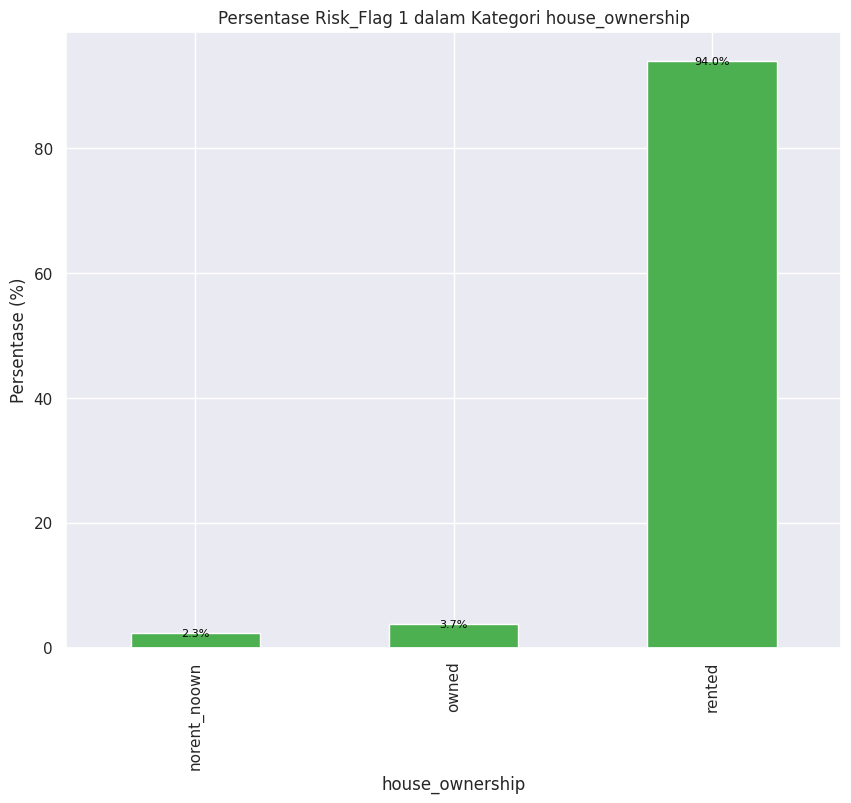

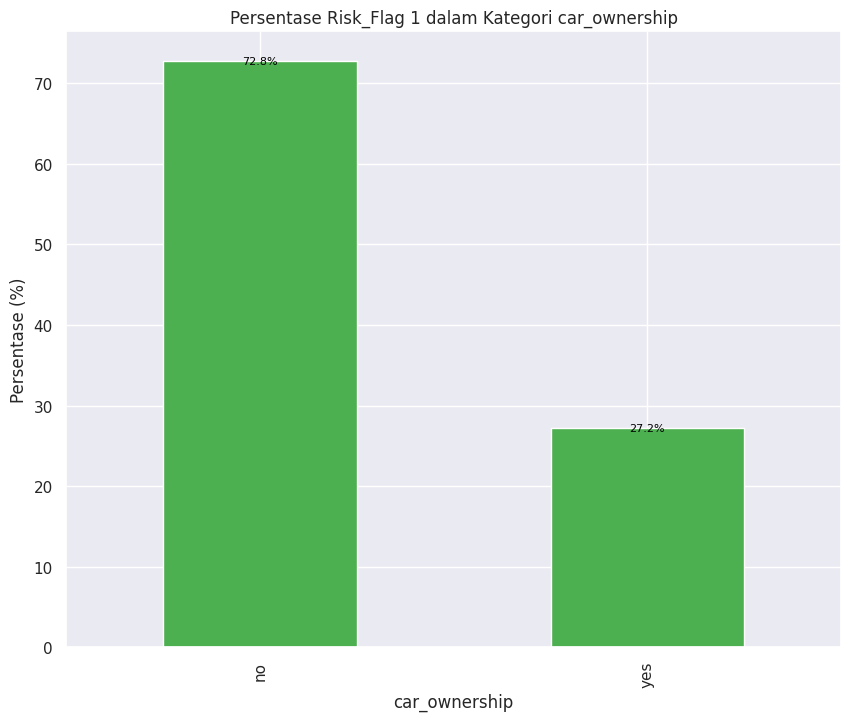

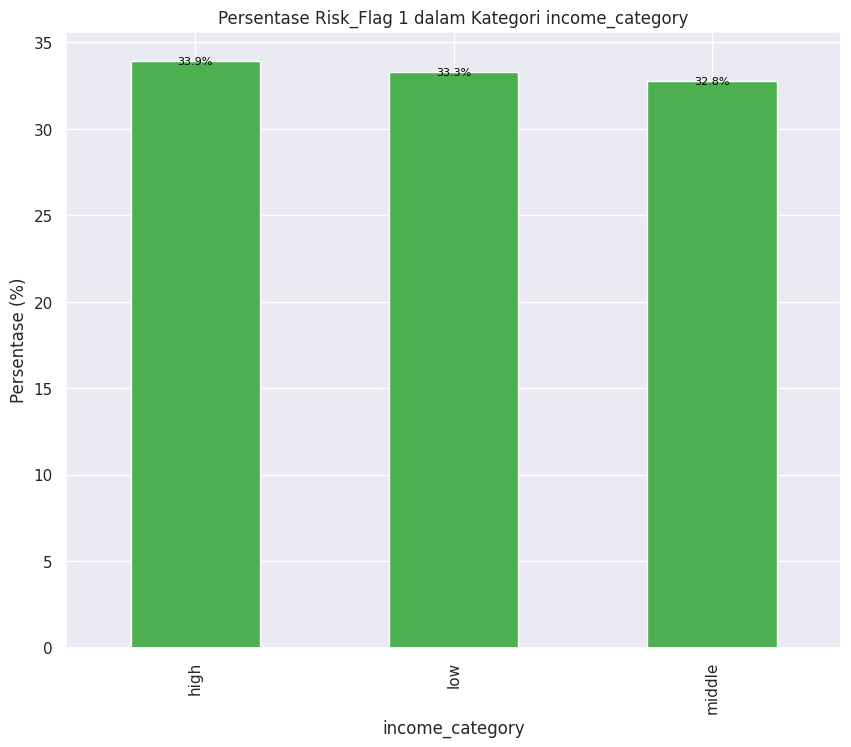

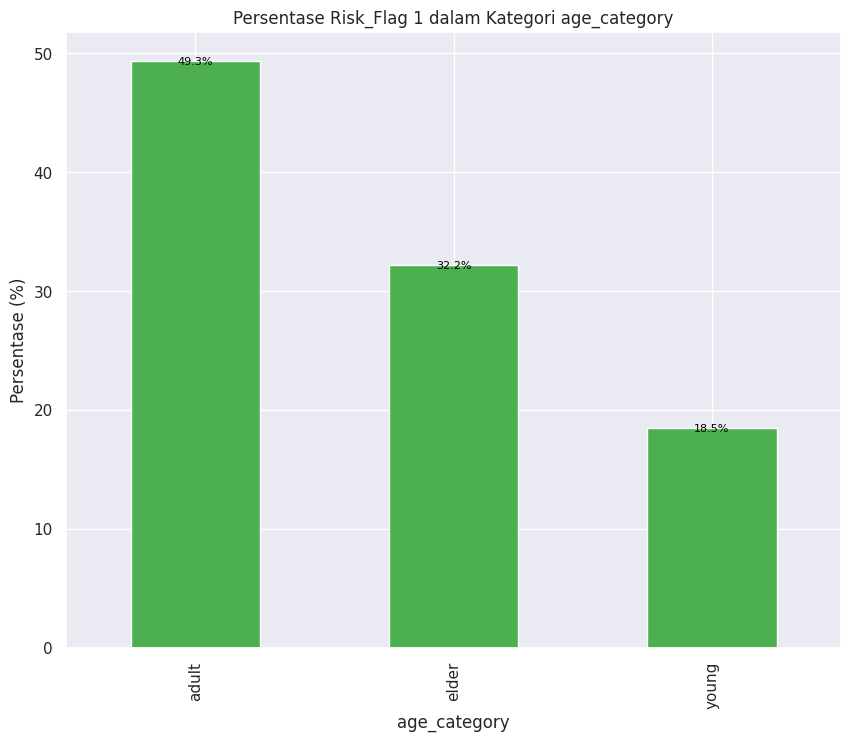

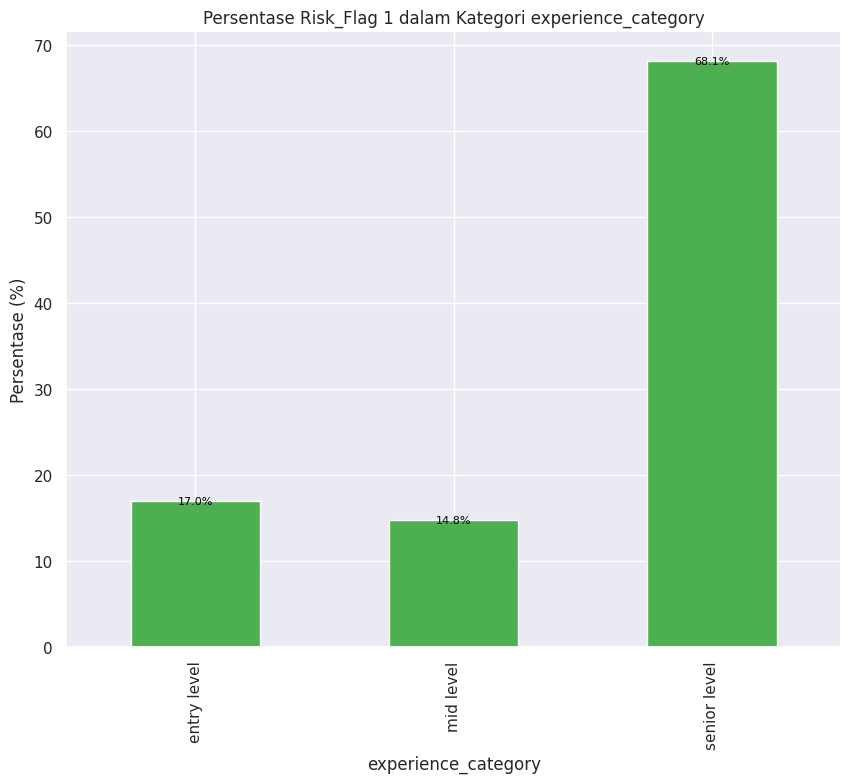

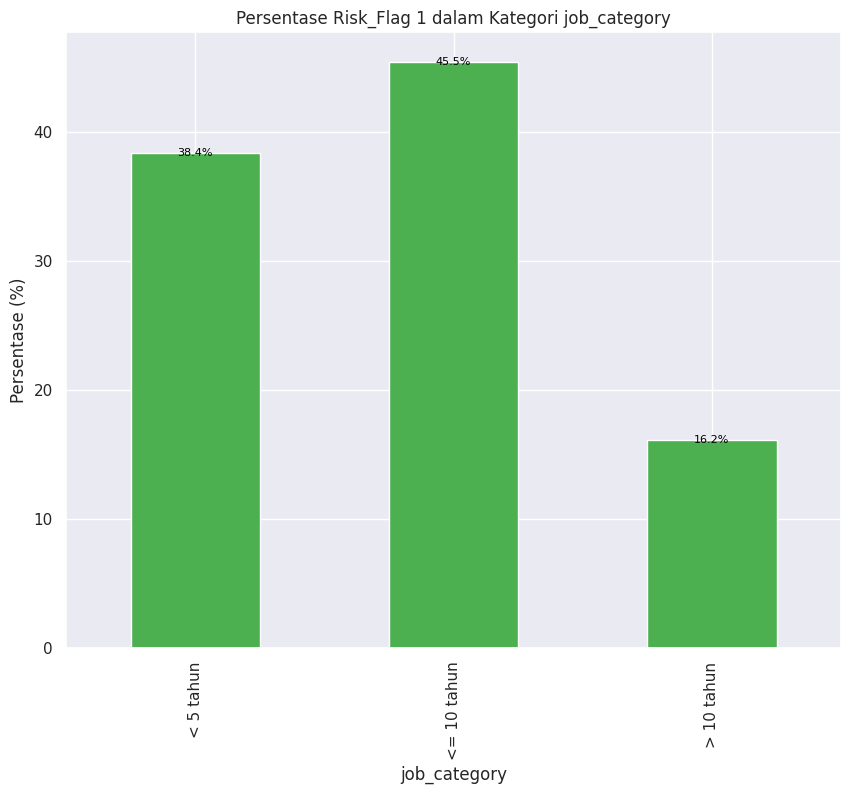

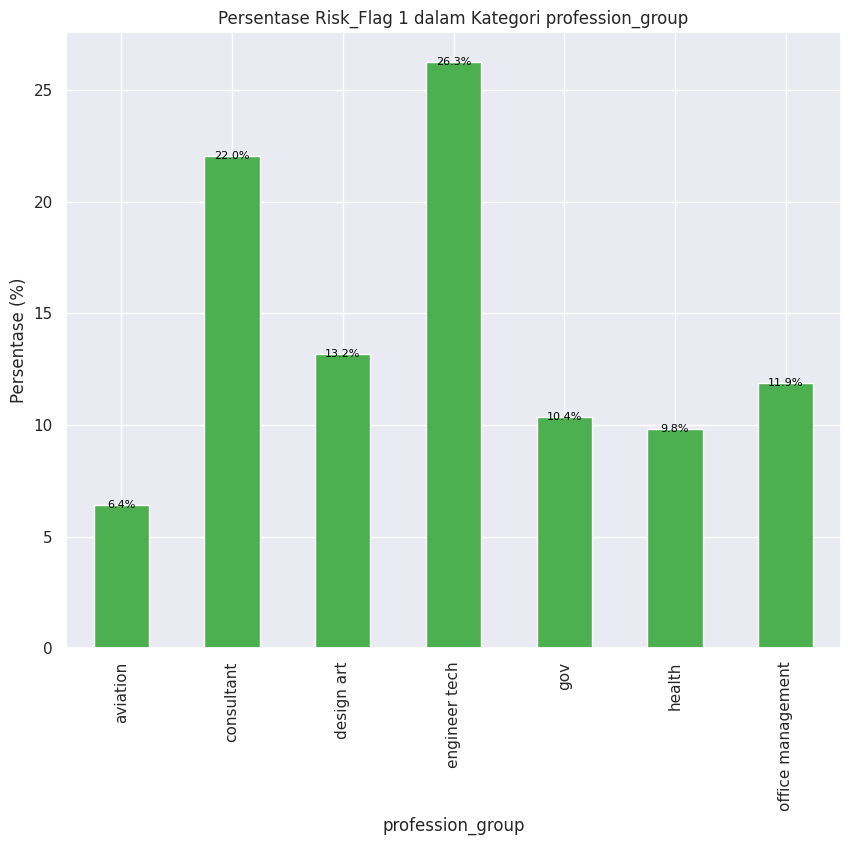

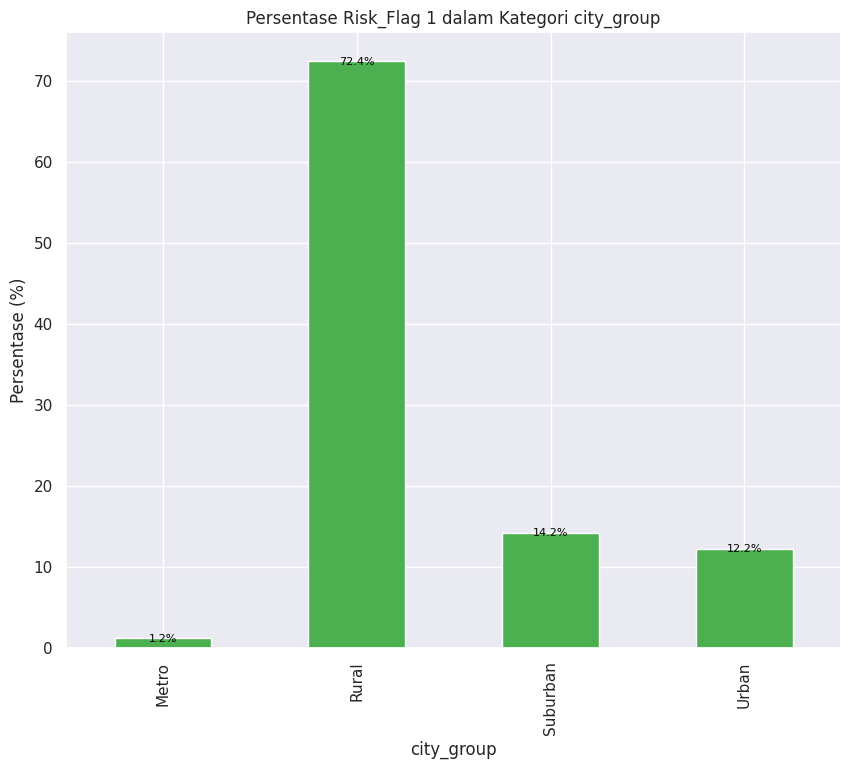

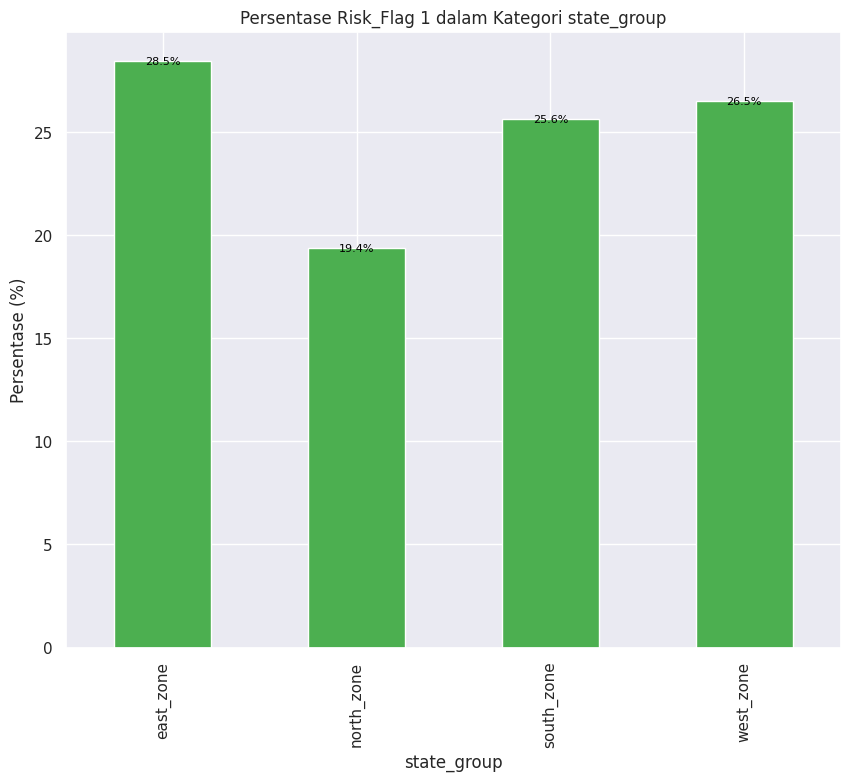

In [ ]:


cats = ['marital_status', 'house_ownership', 'car_ownership', 'income_category',
        'age_category', 'experience_category', 'job_category', 'profession_group',
        'city_group', 'state_group']

for cat in cats:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase risk flag 1 dalam setiap kategori
    cats_group = df[df['risk_flag'] == 1].groupby(cat).size() / df[df['risk_flag'] == 1].shape[0] * 100

    ax = cats_group.plot(kind='bar', color='#4CAF50')

    plt.title(f'Persentase Risk_Flag 1 dalam Kategori {cat}')
    plt.ylabel('Persentase (%)')

    # Menambahkan label persentase pada plot
    for p in ax.patches:
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + p.get_width() / 2, y + height),
                    ha='center', va='center', fontsize=8, color='black')

    plt.show()

## Business Insight and Recomendation

### Business Insight




1.   Berdasarkan analisis yang telah dilakukan didapatkan bahwa pengajuan kredit paling banyak pada kategori income middle (3292924 – 6671351 Rupee) tetapi rentang gaji yang mempunyai resiko paling tinggi berada di rentang gaji high dan low.
2.   Apabila dilihat dari rentang usia yang mengajukan kredit terlihat paling banyak di kategori adult (30 – 60 tahun) dan kategori adult mempunyai tingkat resiko yang paling tinggi.
3.  Jika dilihat berdasarkan pengalaman kerja, pengajuan kredit banyak dilakukan pada tingkat senior level dan di level ini resiko kredit juga ditemukan paling banyak.
4.  Jika dilihat dari lamanya bekerja untuk pekerjaan saat ini didominasi dibawah 10 tahun dengan resiko kredit terbesar di rentang 5-10 tahun bekerja di perusahaan tersebut.
5.  Jenis pekerjaan yang banyak mengajuan kredit dan mempunyai resiko kredit paling besar yaitu di kategori profesi engineer tech.
6.  Apabila dilihat dari jenis kategori wilayah, pengajuan kredit banyak dilakukan pada wilayah Rural Area begitupun resiko kreditnya mempunyai resiko yang tinggi di wilayah ini.
7.  Apabila dilihat berdasarkan kategori zona state yang banyak melakukan pengajuan berada pada zona south_zone tetapi tingkat resiko paling tinggi di temukan diwilayah east_zone.

### Business Insight



1.  Bank dapat melakukan peningkatan pemasaran pada customer dengan level income middle hingga high untuk semua rentang usia tetapi perlu di lihat juga profil dari nasabah tersebut sehingga dapat meminimalkan resiko.
2.   Dilihat berdasarkan pengalaman kerja customer, kategori yang memiliki kapabilibilitas kredit yang baik yaitu dengan pengalaman kerja diatas 5 tahun dengan tingkat lama bekerja untuk pekerjaan saat ini yaitu diatas 5 tahun tetapi perlu di lihat juga profil dari nasabah tersebut sehingga dapat meminimalkan resiko.
3.  Meningkatkan pemasaran pada kategori profesi yang masing rendah.
4.  Meningkatkan pengawasan terhadap resiko kredit untuk customer yang tinggal di Rural area dan di east state.

